# Market-Basket-Optimization

Applying associative rule learning on market basket optimization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [2]:
# Data clencing operations for dataset
df = pd.read_csv('Market_Basket_Optimisation.csv',header=None)
df = df.astype(str)
for i in df.columns :
    df[i] = df[i].apply(lambda x : x.strip())

In [3]:
# find distinct products in dataset and add it to a set
product_set = set([]) 
for i in range(0,20) :
    for j in df[i].value_counts().index.values :
        if j!='nan' :
            product_set.add(j.strip())

In [4]:
# Create dataframe for all products and update data from df dataframe
product_df = pd.DataFrame(columns=list(product_set),data=np.zeros((df.shape[0],len(product_set))))
for x in product_set :
    for i in range(0,df.shape[1]) :
        ix = df[df[i]==x][i].index.values
        product_df.loc[ix,x] = 1

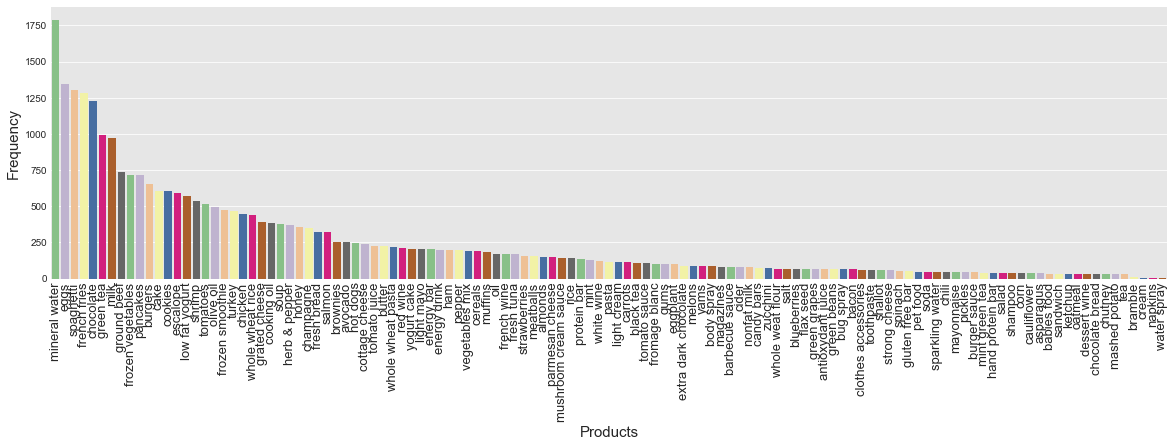

In [5]:
#  ploting most frequently bought items
df_plot = pd.DataFrame(product_df.sum(),columns=['count'])
df_plot = df_plot.sort_values('count',ascending=False)
fig = plt.figure(figsize=(20,5))
sns.barplot(x=df_plot.index,y=df_plot['count'],palette='Accent')
plt.xlabel('Products',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(rotation=90,fontsize=13)
plt.show()

In [6]:
# threshold values
number = 35 # number of times in a week
products = 2 # no of products bought together

In [7]:
# Function to get most frequent bought items based on threshold values 
def products_bought_together(product_df,number,products):    
    l =[]
    for i in product_set :
        d = pd.DataFrame(product_df[product_df[i]==1][product_df.columns.values].sum())
        d.columns = ['count']
        d.reset_index(inplace=True)
        d = d[d['count']>number].sort_values('count',ascending=False)['index'].head(products)
        if len(d.values)==products :
            t =[i for i in d.values]
            t.sort()
            if not t in l:
                l.append(t)
    cols = ['product'+str(i) for i in range(1,products+1)]
    products_bought_together = pd.DataFrame(l,columns=cols)
    return products_bought_together

In [8]:
products_bought_together(product_df,number,products)

,product1,product2
0,hot dogs,mineral water
1,chocolate,escalope
2,chocolate,mineral water
3,mineral water,shrimp
4,parmesan cheese,spaghetti
5,mineral water,nonfat milk
6,meatballs,mineral water
7,mineral water,oil
8,eggs,turkey
9,mineral water,red wine
